# Vader Median


In [1]:
import pandas as pd
features_and_target = pd.read_csv('data_with_everything.csv')


In [2]:

features_and_target.columns

Index(['altmetric_id', 'tweet_id', 'tweet_url', 'tweet_post_date',
       'twitter_author_url', 'selected_quotes', 'twitter_author_description',
       'twitter_author_id', 'twitter_author_handle',
       'twitter_author_followers', 'twitter_author_name', 'paper_title',
       'paper_abstract', 'paper_doi', 'paper_pubdate', 'twitter_rt_count',
       'subjects', 'Publisher_subjects', 'Scopus_Subjects', 'Count_HashTags',
       'Abstract_Length', 'followers_count', 'author_count', 'title_Vader',
       'abstract_Vader', 'Tw_Vader_mean', 'Tw_Vader_median', 'title_TB',
       'abstract_TB', 'Tw_TB_mean', 'Tw_TB_median'],
      dtype='object')

In [3]:
final_score_list=[]
for val in features_and_target['Tw_Vader_median']:
    if val > 0:
        final_score_list.append(1)
    elif val < 0:
        final_score_list.append(-1)
    else:
        final_score_list.append(0)

print(len(final_score_list))

features_and_target = features_and_target.assign(class_label_Vader_median=final_score_list)
 

148712


In [4]:
features_and_target.columns

Index(['altmetric_id', 'tweet_id', 'tweet_url', 'tweet_post_date',
       'twitter_author_url', 'selected_quotes', 'twitter_author_description',
       'twitter_author_id', 'twitter_author_handle',
       'twitter_author_followers', 'twitter_author_name', 'paper_title',
       'paper_abstract', 'paper_doi', 'paper_pubdate', 'twitter_rt_count',
       'subjects', 'Publisher_subjects', 'Scopus_Subjects', 'Count_HashTags',
       'Abstract_Length', 'followers_count', 'author_count', 'title_Vader',
       'abstract_Vader', 'Tw_Vader_mean', 'Tw_Vader_median', 'title_TB',
       'abstract_TB', 'Tw_TB_mean', 'Tw_TB_median',
       'class_label_Vader_median'],
      dtype='object')

In [5]:

features_and_target_to_use = features_and_target[['Scopus_Subjects','title_Vader','abstract_Vader',\
                                                  'Count_HashTags','Abstract_Length','followers_count','author_count',\
                                                  'class_label_Vader_median']]

In [6]:
# observing the counts of positive and negative
from collections import Counter
tw_Vader_median_class_list =features_and_target_to_use['class_label_Vader_median'].tolist()
a = dict(Counter(tw_Vader_median_class_list))
print(a)

{-1: 32754, 0: 70352, 1: 45606}


In [7]:
features_and_target_to_use.shape

(148712, 8)

In [8]:
# considering only +1 and -1
features_and_target_to_use_2_labels = features_and_target_to_use[features_and_target_to_use.class_label_Vader_median != 0]

In [9]:
features_and_target_to_use_2_labels.shape

(78360, 8)

In [10]:
# observing the counts of positive and negative
from collections import Counter
fb_Vader_mean_class_list =features_and_target_to_use_2_labels['class_label_Vader_median'].tolist()
a = dict(Counter(fb_Vader_mean_class_list))
print(a)

{-1: 32754, 1: 45606}


In [11]:
features_and_target_to_use_2_labels.columns  = ['Scopus Subjects', 'Title Sentiment','Abstract Sentiment', 'Hashtag Count','Abstract Length','Tweet Reach','Author Count','Tweet Sentiment']

In [12]:
features_and_target_to_use_2_labels.columns

Index(['Scopus Subjects', 'Title Sentiment', 'Abstract Sentiment',
       'Hashtag Count', 'Abstract Length', 'Tweet Reach', 'Author Count',
       'Tweet Sentiment'],
      dtype='object')

In [13]:
features_and_target_to_use_2_labels

,Scopus Subjects,Title Sentiment,Abstract Sentiment,Hashtag Count,Abstract Length,Tweet Reach,Author Count,Tweet Sentiment
0,Medicine,-0.6597,-0.9758,4,1822,1312,6.0,-1
2,Health Sciences,0.8074,0.9584,0,939,2612,3.0,1
3,Medicine,-0.5106,-0.9648,2,1560,1427,3.0,-1
5,"Biochemistry, Genetics and Molecular Biology",-0.6597,-0.8363,6,1768,3907,11.0,-1
6,Medicine,0.0000,0.9708,0,580,987,5.0,1
7,Health Sciences,0.0000,0.4019,0,844,777,6.0,1
8,Health Sciences,-0.4215,-0.9866,1,1376,9330,16.0,-1
10,Medicine,-0.2960,0.9186,0,1762,7323,15.0,1
11,"Biochemistry, Genetics and Molecular Biology",0.4019,0.9741,3,973,610,4.0,1
12,"Biochemistry, Genetics and Molecular Biology",-0.6597,-0.3612,0,965,305,3.0,-1


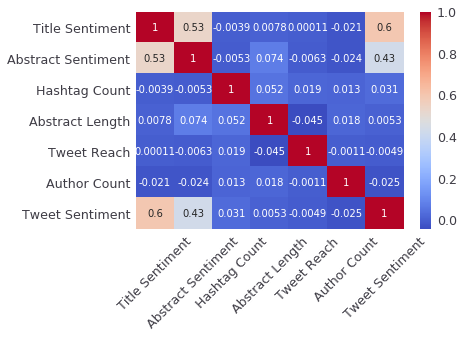

In [23]:
import matplotlib.pyplot as plt
import seaborn as sn
corrMatrix = features_and_target_to_use_2_labels.corr()
sn.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.show()

In [15]:
'''
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(features_and_target_to_use_2_labels, hue='class_label_Vader_median')
'''

"\n# Seaborn visualization library\nimport seaborn as sns\n# Create the default pairplot\nsns.pairplot(features_and_target_to_use_2_labels, hue='class_label_Vader_median')\n"

Standard scaling

In [16]:
print(features_and_target_to_use_2_labels['Scopus Subjects'].unique())

print(len(features_and_target_to_use_2_labels['Scopus Subjects'].unique()))

['Medicine' 'Health Sciences'
 'Biochemistry, Genetics and Molecular Biology' 'Physical Sciences'
 'Life Sciences' 'Dentistry' 'Veterinary' 'Psychology' 'General'
 'Environmental Science' 'Materials Science'
 'Agricultural and Biological Sciences' 'Nursing' 'Chemical Engineering'
 'Health Professions' 'Social Sciences' 'Arts and Humanities'
 'Physics and Astronomy' 'Pharmacology, Toxicology and Pharmaceutics'
 'Mathematics' 'Chemistry' 'Immunology and Microbiology' 'Engineering'
 'Business, Management and Accounting']
24


In [17]:
# taking features
X = features_and_target_to_use_2_labels.iloc[:, :-1].values
y = features_and_target_to_use_2_labels.iloc[:, 7].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

from imblearn.over_sampling import SMOTE
import numpy as np
# observing the counts of positive and negative before SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
# applying SMOTE
smt = SMOTE()
X, y = smt.fit_sample(X, y)
# checking the rows
# observing the counts of positive and negative after SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))


# splitiing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)




# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=4)
DT.fit(X_train, y_train)

# Predicting the Test set results
y_predDT = DT.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predDT)

import sklearn.metrics
print('Accuracy',sklearn.metrics.accuracy_score(y_test, y_predDT))
print('Precision',sklearn.metrics.precision_score(y_test, y_predDT))
print('Recall',sklearn.metrics.recall_score(y_test, y_predDT))
print('F-1 score',sklearn.metrics.f1_score(y_test, y_predDT))

print()
print('confusion matrix')
print(cm)
print()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = DT, X = X_train, y = y_train, cv = 10)
print('accuracies mean',accuracies.mean())
print('accuracies with 2 SD', accuracies.std() * 2)
print()

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{'criterion': ["gini"], 'max_depth': [1,2,3,14,15], 'min_samples_split': [4,6,8,300,450,600]},
               {'criterion': ["entropy"], 'max_depth': [1,2,13,14,15], 'min_samples_split': [4,6,250,425,450,475,575,600]}]
grid_search = GridSearchCV(estimator = DT,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1, verbose=1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


from sklearn.metrics import classification_report
report =classification_report(y_test, y_predDT)

print()
print('classification report')
print(report)
print()

print('best accuracy', best_accuracy)
print('best parameters')
print(best_parameters)
print()

print('feature importances')
print(features_and_target_to_use_2_labels.columns)
print(DT.feature_importances_)
print()

/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
Using TensorFlow backend.


Frequency of unique values of the said array:
[[   -1     1]
 [32754 45606]]
Frequency of unique values of the said array:
[[   -1     1]
 [45606 45606]]
Accuracy 0.8279888176286795
Precision 0.8081128026974558
Recall 0.8625804340713273
F-1 score 0.8344587465710065

confusion matrix
[[7196 1878]
 [1260 7909]]

accuracies mean 0.827584414771356
accuracies with 2 SD 0.006039274374138442

Fitting 10 folds for each of 70 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 606 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:  2.4min finished



classification report
              precision    recall  f1-score   support

          -1       0.85      0.79      0.82      9074
           1       0.81      0.86      0.83      9169

    accuracy                           0.83     18243
   macro avg       0.83      0.83      0.83     18243
weighted avg       0.83      0.83      0.83     18243


best accuracy 0.832531623017994
best parameters
{'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 600}

feature importances
Index(['Scopus Subjects', 'Title Sentiment', 'Abstract Sentiment',
       'Hashtag Count', 'Abstract Length', 'Tweet Reach', 'Author Count',
       'Tweet Sentiment'],
      dtype='object')
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.31656833e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0

In [18]:
# taking features
X = features_and_target_to_use_2_labels.iloc[:, :-1].values
y = features_and_target_to_use_2_labels.iloc[:, 7].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

from imblearn.over_sampling import SMOTE
import numpy as np
# observing the counts of positive and negative before SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
# applying SMOTE
smt = SMOTE()
X, y = smt.fit_sample(X, y)
# checking the rows
# observing the counts of positive and negative after SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))


# splitiing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth= 20, min_samples_split=600, n_estimators=60)
RF.fit(X_train, y_train)

# Predicting the Test set results
y_predRF = RF.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predRF)


import sklearn.metrics
print('Accuracy',sklearn.metrics.accuracy_score(y_test, y_predRF))
print('Precision',sklearn.metrics.precision_score(y_test, y_predRF))
print('Recall',sklearn.metrics.recall_score(y_test, y_predRF))
print('F-1 score',sklearn.metrics.f1_score(y_test, y_predRF))

print()
print('confusion matrix')
print(cm)
print()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RF, X = X_train, y = y_train, cv = 10)
print('accuracies mean',accuracies.mean())
print('accuracies with 2 SD', accuracies.std() * 2)
print()


# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{'criterion': ["entropy"], 'max_depth': [10,20,40,60,80,100,120], 'min_samples_split': [20,40,60,80], 'n_estimators':[10,20,30,40], 'bootstrap':[False]}]
grid_search = GridSearchCV(estimator = RF,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1, verbose=1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


from sklearn.metrics import classification_report
report =classification_report(y_test, y_predRF)

print()
print('classification report')
print(report)
print()

print('best accuracy', best_accuracy)
print('best parameters')
print(best_parameters)
print()

print('feature importances')
print(features_and_target_to_use_2_labels.columns)
print(RF.feature_importances_)
print()


Frequency of unique values of the said array:
[[   -1     1]
 [32754 45606]]


/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Frequency of unique values of the said array:
[[   -1     1]
 [45606 45606]]
Accuracy 0.8389519267664309
Precision 0.8265380987317891
Recall 0.8600719816773912
F-1 score 0.8429716729021913

confusion matrix
[[7419 1655]
 [1283 7886]]

accuracies mean 0.8390003205680543
accuracies with 2 SD 0.007445892643463283

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed: 54.4min finished



classification report
              precision    recall  f1-score   support

          -1       0.85      0.82      0.83      9074
           1       0.83      0.86      0.84      9169

    accuracy                           0.84     18243
   macro avg       0.84      0.84      0.84     18243
weighted avg       0.84      0.84      0.84     18243


best accuracy 0.8410831997149475
best parameters
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 40, 'min_samples_split': 80, 'n_estimators': 30}

feature importances
Index(['Scopus Subjects', 'Title Sentiment', 'Abstract Sentiment',
       'Hashtag Count', 'Abstract Length', 'Tweet Reach', 'Author Count',
       'Tweet Sentiment'],
      dtype='object')
[1.41670050e-03 8.02044132e-05 3.93000575e-02 0.00000000e+00
 1.26480436e-04 3.08643990e-05 1.86962633e-04 0.00000000e+00
 4.92373668e-04 1.66451261e-03 3.02179670e-04 1.39473064e-02
 2.09880524e-07 3.41469801e-03 1.88407400e-03 3.70955897e-05
 4.60936273e-02 2.56603604e-04 7.71856

In [19]:
# taking features
X = features_and_target_to_use_2_labels.iloc[:, :-1].values
y = features_and_target_to_use_2_labels.iloc[:, 7].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

from imblearn.over_sampling import SMOTE
import numpy as np
# observing the counts of positive and negative before SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
# applying SMOTE
smt = SMOTE()
X, y = smt.fit_sample(X, y)
# checking the rows
# observing the counts of positive and negative after SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))


# splitiing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


##Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C = 0.1, multi_class='ovr', penalty='l1', solver= 'liblinear')
LR.fit(X_train, y_train)
y_predLR = LR.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predLR)


import sklearn.metrics
print('Accuracy',sklearn.metrics.accuracy_score(y_test, y_predLR))
print('Precision',sklearn.metrics.precision_score(y_test, y_predLR))
print('Recall',sklearn.metrics.recall_score(y_test, y_predLR))
print('F-1 score',sklearn.metrics.f1_score(y_test, y_predLR))

print()
print('confusion matrix')
print(cm)
print()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LR, X = X_train, y = y_train, cv = 10)
accuracies.mean()

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty': ["l1"], 'C': [0.1,0.2,0.5,0.8,1,1.2,1.4], 'solver':['liblinear','saga'], 'multi_class':['ovr']},
             {'penalty': ["l2"], 'C': [0.1,0.2,0.5,0.8,1,1.2,1.4], 'solver':['newton-cg','lbfgs','sag'], 'multi_class':['ovr', 'multinomial']}
             ]
grid_search = GridSearchCV(estimator = LR,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1, verbose=1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LR, X = X_train, y = y_train, cv = 10)
print('accuracies mean',accuracies.mean())
print('accuracies with 2 SD', accuracies.std() * 2)
print()

from sklearn.metrics import classification_report
report =classification_report(y_test, y_predLR)

print()
print('classification report')
print(report)
print()

print('best accuracy', best_accuracy)
print('best parameters')
print(best_parameters)
print()


Frequency of unique values of the said array:
[[   -1     1]
 [32754 45606]]


/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Frequency of unique values of the said array:
[[   -1     1]
 [45606 45606]]
Accuracy 0.8109959984651647
Precision 0.7989965506428347
Recall 0.8336786999672811
F-1 score 0.8159692570452605

confusion matrix
[[7151 1923]
 [1525 7644]]

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:  8.7min finished


accuracies mean 0.8078502753827788
accuracies with 2 SD 0.009804905539250392


classification report
              precision    recall  f1-score   support

          -1       0.82      0.79      0.81      9074
           1       0.80      0.83      0.82      9169

    accuracy                           0.81     18243
   macro avg       0.81      0.81      0.81     18243
weighted avg       0.81      0.81      0.81     18243


best accuracy 0.8080554756129316
best parameters
{'C': 0.5, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}



In [20]:
# taking features
X = features_and_target_to_use_2_labels.iloc[:, :-1].values
y = features_and_target_to_use_2_labels.iloc[:, 7].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

from imblearn.over_sampling import SMOTE
import numpy as np
# observing the counts of positive and negative before SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
# applying SMOTE
smt = SMOTE()
X, y = smt.fit_sample(X, y)
# checking the rows
# observing the counts of positive and negative after SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))


# splitiing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)

# Predicting the Test set results
y_predNB = NB.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predNB)


import sklearn.metrics
print('Accuracy',sklearn.metrics.accuracy_score(y_test, y_predNB))
print('Precision',sklearn.metrics.precision_score(y_test, y_predNB))
print('Recall',sklearn.metrics.recall_score(y_test, y_predNB))
print('F-1 score',sklearn.metrics.f1_score(y_test, y_predNB))

print()
print('confusion matrix')
print(cm)
print()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = NB, X = X_train, y = y_train, cv = 10)
print('accuracies mean',accuracies.mean())
print('accuracies with 2 SD', accuracies.std() * 2)
print()

from sklearn.metrics import classification_report
report =classification_report(y_test, y_predNB)

print()
print('classification report')
print(report)
print()


Frequency of unique values of the said array:
[[   -1     1]
 [32754 45606]]


/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Frequency of unique values of the said array:
[[   -1     1]
 [45606 45606]]
Accuracy 0.6510990516910596
Precision 0.7972858354537744
Recall 0.4100774348347693
F-1 score 0.541591645660785

confusion matrix
[[8118  956]
 [5409 3760]]

accuracies mean 0.627746409174153
accuracies with 2 SD 0.11434509734801618


classification report
              precision    recall  f1-score   support

          -1       0.60      0.89      0.72      9074
           1       0.80      0.41      0.54      9169

    accuracy                           0.65     18243
   macro avg       0.70      0.65      0.63     18243
weighted avg       0.70      0.65      0.63     18243




In [21]:
# taking features
X = features_and_target_to_use_2_labels.iloc[:, :-1].values
y = features_and_target_to_use_2_labels.iloc[:, 7].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

from imblearn.over_sampling import SMOTE
import numpy as np
# observing the counts of positive and negative before SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
# applying SMOTE
smt = SMOTE()
X, y = smt.fit_sample(X, y)
# checking the rows
# observing the counts of positive and negative after SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))


# splitiing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 160, algorithm= 'auto')
KNN.fit(X_train, y_train)

# Predicting the Test set results
y_predKNN = KNN.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predKNN)


import sklearn.metrics
print('Accuracy',sklearn.metrics.accuracy_score(y_test, y_predKNN))
print('Precision',sklearn.metrics.precision_score(y_test, y_predKNN))
print('Recall',sklearn.metrics.recall_score(y_test, y_predKNN))
print('F-1 score',sklearn.metrics.f1_score(y_test, y_predKNN))

print()
print('confusion matrix')
print(cm)
print()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = KNN, X = X_train, y = y_train, cv = 10)
print('accuracies mean',accuracies.mean())
print('accuracies with 2 SD', accuracies.std() * 2)
print()

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{'n_neighbors': [5,10,20,25,30,40,50,100,120,140,160,180,200,220,240], 'algorithm': ['ball_tree','kd_tree']}]
grid_search = GridSearchCV(estimator = KNN,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1, verbose=1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


from sklearn.metrics import classification_report
report =classification_report(y_test, y_predKNN)

print()
print('classification report')
print(report)
print()

print('best accuracy', best_accuracy)
print('best parameters')
print(best_parameters)
print()


Frequency of unique values of the said array:
[[   -1     1]
 [32754 45606]]


/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Frequency of unique values of the said array:
[[   -1     1]
 [45606 45606]]
Accuracy 0.8118730471961848
Precision 0.789134159862917
Recall 0.8538553822663322
F-1 score 0.8202200104766895

confusion matrix
[[6982 2092]
 [1340 7829]]

accuracies mean 0.806191943228727
accuracies with 2 SD 0.006792205168919986

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 77.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 132.9min finished



classification report
              precision    recall  f1-score   support

          -1       0.84      0.77      0.80      9074
           1       0.79      0.85      0.82      9169

    accuracy                           0.81     18243
   macro avg       0.81      0.81      0.81     18243
weighted avg       0.81      0.81      0.81     18243


best accuracy 0.8125779440584358
best parameters
{'algorithm': 'ball_tree', 'n_neighbors': 20}



<Figure size 432x288 with 0 Axes>

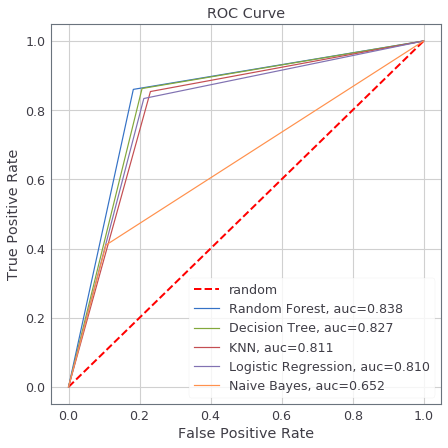

In [22]:
"""PLOTTING"""

from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure(0).clf()

plt.figure(figsize=(7,7))

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

x = [0.0, 1.0]
plt.plot(x, x, linestyle='dashed', color='red', linewidth=2, label='random')

#RF
fpr, tpr, thresh = metrics.roc_curve(y_test, y_predRF)
auc = metrics.roc_auc_score(y_test, y_predRF)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc)[:5])

#DT
fpr, tpr, thresh = metrics.roc_curve(y_test, y_predDT)
auc = metrics.roc_auc_score(y_test, y_predDT)
plt.plot(fpr,tpr,label="Decision Tree, auc="+str(auc)[:5])

#KNN
fpr, tpr, thresh = metrics.roc_curve(y_test, y_predKNN)
auc = metrics.roc_auc_score(y_test, y_predKNN)
plt.plot(fpr,tpr,label="KNN, auc="+str(auc)[:5])

#LR
fpr, tpr, thresh = metrics.roc_curve(y_test, y_predLR)
auc = metrics.roc_auc_score(y_test, y_predLR)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc)[:5])

#NB
fpr, tpr, thresh = metrics.roc_curve(y_test, y_predNB)
auc = metrics.roc_auc_score(y_test, y_predNB)
plt.plot(fpr,tpr,label="Naive Bayes, auc="+str(auc)[:5])

plt.legend(loc='lower right')

plt.show()